In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

data = "/Users/amatulghina/Documents/ironhack/course/week_5/day_1/lab-eda-univariate/amz_uk_price_prediction_dataset.csv"
df = pd.read_csv(data)

### Part 1: Understanding Product Categories
Business Question: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

1. Frequency Tables:
    - Generate a frequency table for the product category.
    - Which are the top 5 most listed product categories?

In [2]:
df[["category"]].value_counts().head()

category                              
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
dtype: int64

Top 5 most listed product categories are :
1. Sports & Outdoors
2. Beauty
3. Handmade Clothing, Shoes & Accessories
4. Bath & Body
5. Birthday Gifts

In [3]:
top_5 = ["Sports & Outdoors","Beauty","Handmade Clothing, Shoes & Accessories","Bath & Body","Birthday Gifts"]
df_top_5 = df[df["category"].isin(top_5)]
sports = df[df["category"]=="Sports & Outdoors"]
beauty = df[df["category"]=="Beauty"]
handmade = df[df["category"]=="Handmade Clothing, Shoes & Accessories"]
bath = df[df["category"]=="Bath & Body"]
birthday = df[df["category"]=="Birthday Gifts"]

2. Visualizations:
    - Display the distribution of products across different categories using a bar chart. If you face problems understanding the chart, do it for a subset of top categories.
    - For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

Text(0, 0.5, 'Frequency')

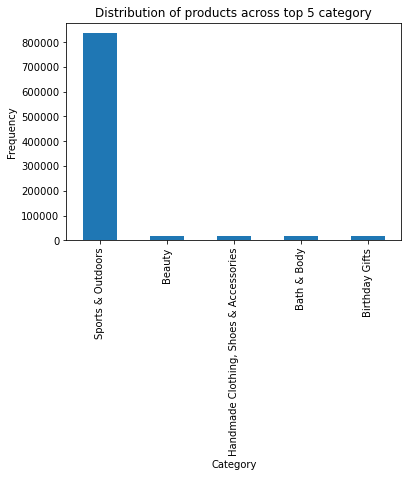

In [4]:
bar = df_top_5['category'].value_counts().plot(kind='bar',title="Distribution of products across top 5 category")
bar.set_xlabel("Category")
bar.set_ylabel("Frequency")

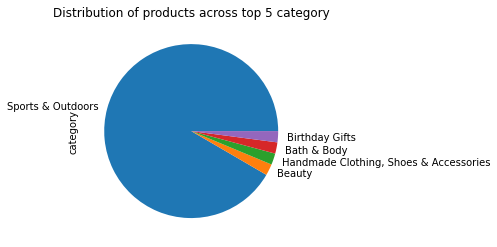

In [5]:
pie = df_top_5['category'].value_counts().plot(kind='pie',title="Distribution of products across top 5 category")

Among the top 5 categories, sports and outdoors category dominate the listing.

### Part 2: Delving into Product Pricing
Business Question: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

1. Measures of Centrality:
    - Calculate the mean, median, and mode for the price of products.
    - What's the average price point of products listed? How does this compare with the most common price point (mode)?


In [14]:
df[["price"]].describe().round(2)

,price
count,2443651.00
mean,89.24
std,345.61
min,0.00
25%,9.99
50%,19.09
75%,45.99
max,100000.00


In [40]:
print("Mean:", round(statistics.mean(df["price"]),2))
print("Median:", statistics.median(df["price"]))
print("Mode:", statistics.mode(df["price"]))

Mean: 89.24
Median: 19.09
Mode: 9.99


The average price point is 89.24 while the mode is 9.99. Our price data show that mode < median < mean indicating the price data is positively skewed.

2. Measures of Dispersion:
    - Determine the variance, standard deviation, range, and interquartile range for product price.
    - How varied are the product prices? Are there any indicators of a significant spread in prices?


In [47]:
print("Variance:", round(df["price"].var(),2))
print("Std. Deviation:", round(df["price"].std(),2))
print("Range:", round(max(df["price"])-min(df["price"])))
print("Q1:", df["price"].quantile(0.25))
print("Q3:", df["price"].quantile(0.75))
print("IQR:", df["price"].quantile(0.75) - df["price"].quantile(0.25))

Variance: 119445.49
Std. Deviation: 345.61
Range: 100000
Q1: 9.99
Q3: 45.99
IQR: 36.0


The range of the price is 100,000 with min of 0 and max of 100,000. But the IQR shows that 50% of products have price range between 9.99 and 45.99.

3. Visualizations:
    - Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. If its hard to read these diagrams, think why this is, and explain how it could be solved..
    - Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.

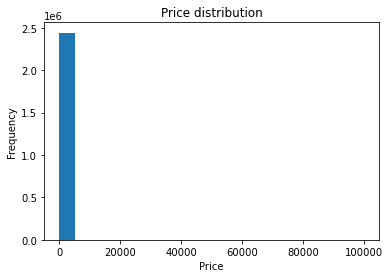

In [61]:
plt.hist(df["price"], bins=20)
plt.title('Price distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

The histogram above is hard to read since our data is positively skewed. Let's think another way how to visualize the data.

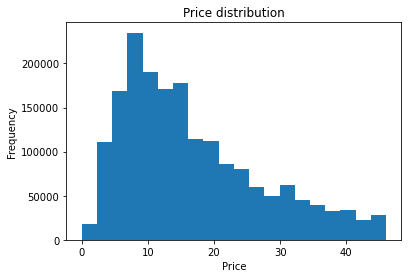

In [73]:
plt.hist(df["price"][(df['price'] <= df['price'].quantile(0.75))], bins=20)
plt.title('Price distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

The histogram above shows the distribution of price who falls under Q3 value (showing bottom 75% of the data). Here, we can already see that the distribution is positively skewed.

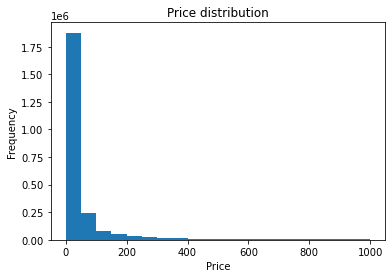

In [72]:
plt.hist(df["price"][(df['price'] <= 1000)], bins=20)
plt.title('Price distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

<AxesSubplot:xlabel='category', ylabel='price'>

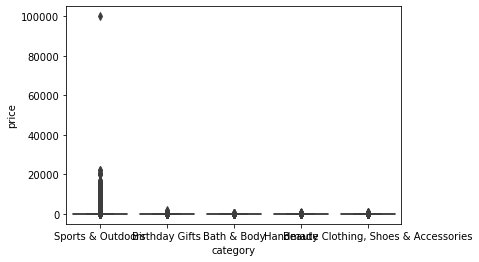

In [80]:
sns.boxplot(data=df_top_5, x=df_top_5["category"], y=df_top_5["price"], whis=(0, 5))

From the box plot above, we can see there is an outlier of the price which is in Sports & Outdoors category.

### Part 3: Unpacking Product Ratings
Business Question: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

1. Measures of Centrality:
    - Calculate the mean, median, and mode for the rating of products.
    - How do customers generally rate products? Is there a common trend?

In [92]:
# Removing ratings data which has 0 value because it means that there is no rating.
ratings = df[df["stars"]!=0]

In [93]:
print("Mean:", round(statistics.mean(ratings["stars"]),2))
print("Median:", statistics.median(ratings["stars"]))
print("Mode:", statistics.mode(ratings["stars"]))

Mean: 4.32
Median: 4.4
Mode: 4.5


The mean, median and mode of the ratings are 4.32, 4.4, and 4.5. This indicates that overall, most customers are satisfy with the products that they bought (above 4).

2. Measures of Dispersion:
    - Determine the variance, standard deviation, and interquartile range for product rating.
    - Are the ratings consistent, or is there a wide variation in customer feedback?

In [94]:
print("Variance:", round(ratings["stars"].var(),2))
print("Std. Deviation:", round(ratings["stars"].std(),2))
print("Range:", round(max(df["price"])-min(ratings["stars"])))
print("Q1:", ratings["stars"].quantile(0.25))
print("Q3:", ratings["stars"].quantile(0.75))
print("IQR:", ratings["stars"].quantile(0.75) - ratings["stars"].quantile(0.25))

Variance: 0.31
Std. Deviation: 0.56
Range: 99999
Q1: 4.1
Q3: 4.6
IQR: 0.5


There is no wide variation in customer feedback since the value of the variance is pretty low 0.31.

3. Shape of the Distribution:
    - Calculate the skewness and kurtosis for the rating column.
    - Are the ratings normally distributed, or do they lean towards higher or lower values?

In [98]:
print("Skewness:", round(ratings['stars'].skew(),4))
print("Kurtosis:", round(ratings['stars'].kurtosis(),4))

Skewness: -2.3796
Kurtosis: 9.7819


The skewness of ratings data is negative. This indicates that the data lean towards higher values (negatively skewed).

The kurtosis of ratings data is positive. This indicates that the ratings data have heavy tails (more disperse), more outliers.

4. Visualizations:
    - Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

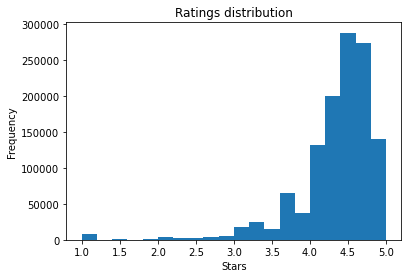

In [99]:
plt.hist(ratings["stars"], bins=20)
plt.title('Ratings distribution')
plt.xlabel('Stars')
plt.ylabel('Frequency')
plt.show()

From the histogram above, we can see that:
- the ratings data is negatively skewed
- the mode of the ratings is 4.5